     x   y  count
0 -127 -39      1
1 -115 -49      1
2 -111 -21      1
3 -109  13      1
4  -97 -37      1


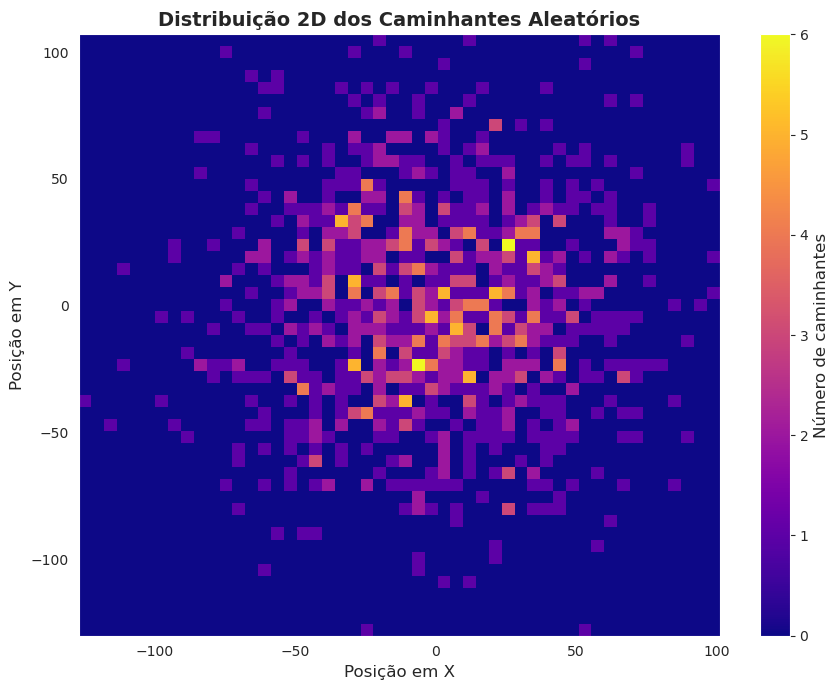

/tmp/ipykernel_3443/1967601970.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


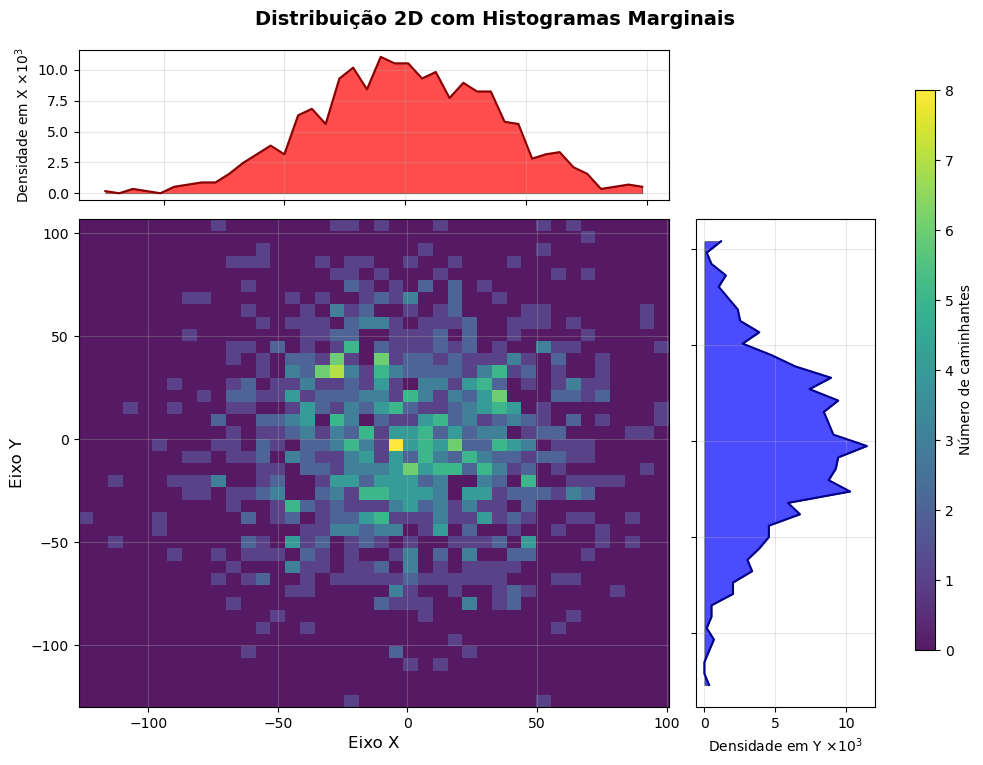

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# ============================
# 1. Ler os dados do arquivo
# ============================
caminho = "/home/jvloliveira/root/Graduação/Semestre 2 - 2025/IntroFiscomp/Projeto-2/tarefa-3/saida-1-12694394.txt"
df = pd.read_csv(caminho, sep=",", header=None, names=["x", "y", "count"])

# Mostrar primeiras linhas para conferência
print(df.head())

# ============================
# 2. Histograma 2D simples (heatmap)
# ============================
plt.figure(figsize=(9, 7))
sns.set_style("darkgrid")

# Heatmap usando hist2d
hist = plt.hist2d(df['x'], df['y'], weights=df['count'], bins=50, cmap='plasma')

# Barra de cores
cbar = plt.colorbar(hist[3])
cbar.set_label("Número de caminhantes", fontsize=12)

# Rótulos e título
plt.xlabel("Posição em X", fontsize=12)
plt.ylabel("Posição em Y", fontsize=12)
plt.title("Distribuição 2D dos Caminhantes Aleatórios", fontsize=14, weight='bold')

# Grade e ajuste
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.savefig('tarefa-3-graf-1.png', dpi=600, bbox_inches='tight')
plt.show()

# ============================
# 3. Heatmap com histogramas marginais (estilo da imagem)
# ============================
plt.style.use('default')
fig = plt.figure(figsize=(10, 8))

# Definir gridspec para controlar o layout
gs = plt.GridSpec(4, 4)

# Heatmap central (2D histogram)
ax_joint = fig.add_subplot(gs[1:4, 0:3])
hist2d = ax_joint.hist2d(df['x'], df['y'], weights=df['count'], bins=40, 
                        cmap='viridis', alpha=0.9)

# Histograma marginal X (topo) - multiplicado por 1000
ax_marg_x = fig.add_subplot(gs[0, 0:3])
x_hist, x_bins = np.histogram(df['x'], weights=df['count'], bins=40, density=True)
x_centers = (x_bins[:-1] + x_bins[1:]) / 2
x_hist_scaled = x_hist * 1000  # Multiplicando por 1000
ax_marg_x.fill_between(x_centers, x_hist_scaled, alpha=0.7, color='red', edgecolor='black', linewidth=0.5)
ax_marg_x.plot(x_centers, x_hist_scaled, color='darkred', linewidth=1.5)
ax_marg_x.set_ylabel(r'Densidade em X $\times 10^3$', fontsize=10)
ax_marg_x.tick_params(axis='x', labelbottom=False)
ax_marg_x.grid(True, alpha=0.3)

# Histograma marginal Y (lado direito) - multiplicado por 1000
ax_marg_y = fig.add_subplot(gs[1:4, 3])
y_hist, y_bins = np.histogram(df['y'], weights=df['count'], bins=40, density=True)
y_centers = (y_bins[:-1] + y_bins[1:]) / 2
y_hist_scaled = y_hist * 1000  # Multiplicando por 1000
ax_marg_y.fill_betweenx(y_centers, y_hist_scaled, alpha=0.7, color='blue', edgecolor='black', linewidth=0.5)
ax_marg_y.plot(y_hist_scaled, y_centers, color='darkblue', linewidth=1.5)
ax_marg_y.set_xlabel(r'Densidade em Y $\times 10^3$', fontsize=10)
ax_marg_y.tick_params(axis='y', labelleft=False)
ax_marg_y.grid(True, alpha=0.3)

# Configurações do heatmap central
ax_joint.set_xlabel('Eixo X', fontsize=12)
ax_joint.set_ylabel('Eixo Y', fontsize=12)
ax_joint.grid(True, alpha=0.3)

# Adicionar barra de cores
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist2d[3], cax=cax)
cbar.set_label('Número de caminhantes', fontsize=10)

# Título
plt.suptitle('Distribuição 2D com Histogramas Marginais', 
             fontsize=14, weight='bold', y=0.95)

# Ajustar layout
plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.88)
plt.savefig('tarefa-3-graf-2.png', dpi=600, bbox_inches='tight')
plt.show()